In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import random
import cv2

## Генерация рукописных символов

In [27]:
alphabet = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

def generate_handwritten_symbol(size=28, thickness=2):
    """
    Генерируем псевдо-рукописный символ (используем OpenCV для отрисовки)
    """
    img = np.zeros((size, size), dtype=np.uint8)
    symbol = random.choice(alphabet)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    scale = 0.9 + 0.3*np.random.rand()
    angle = np.random.uniform(-20, 20)

    temp = np.zeros((60, 60), dtype=np.uint8)
    cv2.putText(temp, symbol, (5, 45), font, scale, 255, thickness, cv2.LINE_AA)

    M = cv2.getRotationMatrix2D((30,30), angle, 1)
    temp = cv2.warpAffine(temp, M, (60,60))

    x,y,w,h = cv2.boundingRect(temp)
    symbol_img = temp[y:y+h, x:x+w]
    symbol_img = cv2.resize(symbol_img, (size,size))


    return (symbol, symbol_img.astype(np.uint8))


def generate_dataset(N=2000):
    X = []
    y = []
    for _ in range(N):
        label, img = generate_handwritten_symbol()
        X.append(img.flatten())
        y.append(label)
    return np.array(X), np.array(y)

X, y = generate_dataset(3000)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 2100
Test size: 900


## Подбор лучшего k для kNN

In [28]:
best_acc = 0
best_k = 1
acc_values = []

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred)
    acc_values.append(acc)

    print(f"k={k}: accuracy={acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_k = k

print("\nЛучшее k =", best_k, "accuracy =", best_acc)


k=1: accuracy=0.9933
k=2: accuracy=0.9933
k=3: accuracy=0.9978
k=4: accuracy=0.9944
k=5: accuracy=0.9956
k=6: accuracy=0.9956
k=7: accuracy=0.9956
k=8: accuracy=0.9944
k=9: accuracy=0.9944

Лучшее k = 3 accuracy = 0.9977777777777778


## Генерация последовательности изображения символов

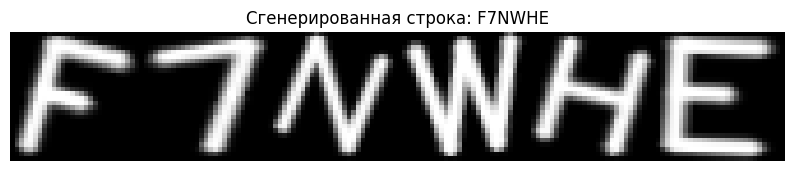

In [29]:
def gen_sequence_image(length=5, size=28):
    seq = [generate_handwritten_symbol(size=size) for _ in range(length)]
    labels = [s[0] for s in seq]
    imgs = [s[1] for s in seq]

    full_img = np.hstack(imgs)

    return "".join(labels), full_img, imgs


true_seq, seq_image, blocks = gen_sequence_image(6)

plt.figure(figsize=(10,2))
plt.imshow(seq_image, cmap='gray')
plt.title("Сгенерированная строка: " + true_seq)
plt.axis("off")
plt.show()

## Распознование последовательности

In [30]:
def recognize_sequence(blocks, clf):
    result = ""
    for img in blocks:
        vec = img.flatten().reshape(1, -1)
        pred = clf.predict(vec)[0]
        result += pred
    return result

recognized = recognize_sequence(blocks, clf)

print("Истинная последовательность:    ", true_seq)
print("Распознанная последовательность:", recognized)

Истинная последовательность:     F7NWHE
Распознанная последовательность: F7NWHE
